## ML Zoom Camp 2022
### Week 2 assignment

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('housing.csv')
housing_df = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]]


Let's check if median_house_value feature has a long tail:

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

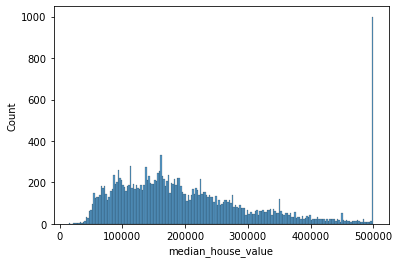

In [92]:
sns.histplot(df.median_house_value,bins=200)

### Question 1
Find a feature with missing values. How many missing values does it have?

let's use info to look into our features:

In [93]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that only 'total_bedrooms' has missing values.
The number of missing values is 20640 -20433 = 207. 

### Question 2

What's the median (50% percentile) for variable 'population'?

In [94]:
housing_df.population.median()

1166.0

The median is the size of a very small town or neighbourhood.

Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [95]:
np.random.seed(42)

n = len(housing_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = housing_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [96]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?


In [97]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [98]:
#it's not a good idea to fillna on original data
def prepare_X(df,val):
    df_num = df
    df_num = df_num.fillna(val)
    X = df_num.values
    return X

In [99]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Let's see how is the prediction with 0 value for missing values:

In [100]:
X_train = prepare_X(df_train,0)
w_0, w = train_linear_regression(X_train,y_train)
y_pred_0 = w_0 + X_train.dot(w)
round(rmse(y_train, y_pred_0),2)


0.34

Let's see how is the prediction with mean value for missing values:

In [101]:
X_train = prepare_X(df_train,df_train.total_bedrooms.mean())
w_mean, w = train_linear_regression(X_train,y_train)
y_pred_mean = w_mean + X_train.dot(w)
round(rmse(y_train, y_pred_mean),2)


0.34

We see that both values are the same.

### Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
